In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import openweathermapy as owm
import pandas as pd
import requests
from pprint import pprint
# import api_key from config file
from config import api_key

In [2]:
# Save config information
url = "https://api.apixu.com/v1/current.json"
city = "Sao+Paulo"

# Build query URL
# query_url = url + "?key=" + api_key + "&q=" + city
query_url = url + "?key=" + api_key + "&q=" + city

# https://api.apixu.com/v1/current.json?key=5d4b0de035954a7580b144622180307&q=Sao Paulo
# print(query_url)

In [15]:
cities = ["Sao Paulo+Brazil", "Montecillos+Honduras", "Harrar+Ehthiopia", "Pereira+Columbia", "Iquitos+Peru"]

# set up lists to hold reponse info
rainfall = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    rainfall.append(response['current']['precip_in'])
    temp.append(response['current']['temp_f'])

In [16]:
weather_dict = {
    "city": cities,
    "Rainfall":rainfall,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)

weather_data_new = weather_data[[ "city","Rainfall", "temp"]]
weather_data_new.head()

#weather_data.head()

,city,Rainfall,temp
0,Sao Paulo+Brazil,0.00,64.4
1,Montecillos+Honduras,0.02,82.8
2,Harrar+Ehthiopia,0.02,82.8
3,Pereira+Columbia,0.00,78.8
4,Iquitos+Peru,0.02,82.8


In [20]:
weather_data_new.to_csv("fileOne.csv", index=False, header=True)

In [17]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
pprint(weather_json)

{'current': {'cloud': 0,
             'condition': {'code': 1030,
                           'icon': '//cdn.apixu.com/weather/64x64/night/143.png',
                           'text': 'Mist'},
             'feelslike_c': 18.0,
             'feelslike_f': 64.4,
             'humidity': 77,
             'is_day': 0,
             'last_updated': '2018-07-07 00:00',
             'last_updated_epoch': 1530932405,
             'precip_in': 0.0,
             'precip_mm': 0.0,
             'pressure_in': 30.7,
             'pressure_mb': 1022.0,
             'temp_c': 18.0,
             'temp_f': 64.4,
             'vis_km': 5.0,
             'vis_miles': 3.0,
             'wind_degree': 140,
             'wind_dir': 'SE',
             'wind_kph': 9.0,
             'wind_mph': 5.6},
 'location': {'country': 'Brazil',
              'lat': -23.53,
              'localtime': '2018-07-07 0:19',
              'localtime_epoch': 1530933575,
              'lon': -46.62,
              'name': 'Sao Paul

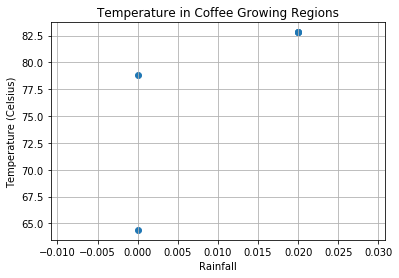

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data_new["Rainfall"], weather_data_new["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in Coffee Growing Regions")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Rainfall")
plt.grid(True)

# Save the figure
# plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()